In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark' + 'grid')
sns.set_palette('muted')
survival_palette={'Survived':'mediumaquamarine', 'Not survived':'lightcoral'}
# Gender colors will be the default muted blue and orange for males and females, respectively
# Source for colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [3]:
df = pd.read_csv('train.csv')
df.info()
# Cabin, embarked and age seem to have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# General statistical information about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target_name,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not survived,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not survived,1


In [42]:
# Analyze missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = total/df.shape[0] * 100
percent = round(percent, 2)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


## Overview of Dataset

 - Numerical data: 
    - Continuous: Age, Fare
    - Discrete: Sibsp, Parch
 - Categorical data:
    - Ordinal (order matters): Pclass
    - Nominal: Sex, Survived, Cabin, Embarked

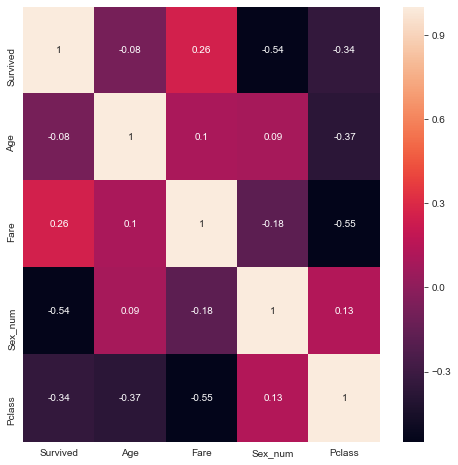

In [177]:
df['Sex_num'] = df['Sex'].map({'female': 0, 'male': 1})
cor_matrix = df[['Survived', 'Age', 'Fare', 'Sex_num', 'Pclass']].corr(method='pearson').round(2)
plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix,annot=True);
# Note can only use Pearson Correlation for continuous data, categorical data with only two variables (i.e. survived and gender). For ordinal data, Spearman is recommended, however in this case they give very similar results. Took out Sibsp and Parch because they are not continuous or ordinal.
# Strong relationship between Fare and Pclass, as expected.
# Medium relationship between age and PCl
# Survivor seems to have strong relationship with gender (females survived more), and medium inverse relationship between Pclass (lower Pclass survived more).
# https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

## Total Survival Rate

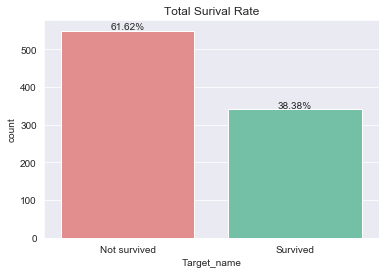

In [188]:
df['Target_name'] = df['Survived'].map({0: 'Not survived', 1: 'Survived'})
ax = sns.countplot(x='Target_name', data=df, palette=survival_palette)
ratio = df[df.Survived==1].shape[0]/df.shape[0]
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/len(df)*100), ha="center") 
ax.set_title("Total Surival Rate");

## Age

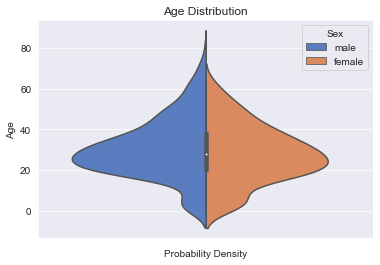

In [153]:
# Mostly middle aged adults, very few seniors
# Common column required for split violin plot to work (not sure if this is a bug?), dropped after use
df['All'] = ""
ax = sns.violinplot(y='Age', x='All', hue='Sex', data=df, split=True);
ax.set_title('Age Distribution');
ax.set_xlabel('Probability Density')
df.drop('All', axis=1, inplace=True)

Median age of survivors and non-survivors: 28.0, 28.0
Average age of survivors and non-survivors: 28.34, 30.63


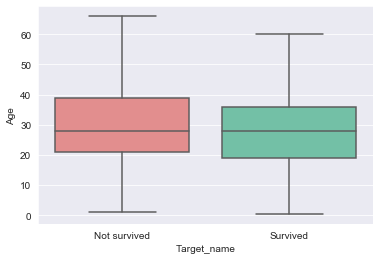

In [172]:
# Median age for survivors and non-survivors is equal, average age is also similar
sns.boxplot(y='Age', x='Target_name', data=df, showfliers = False, palette=survival_palette);
print(f"Median age of survivors and non-survivors: {df[df.Survived==1].Age.median()}, {df[df.Survived==0].Age.median()}")
print(f"Average age of survivors and non-survivors: {df[df.Survived==1].Age.mean():.2f}, {df[df.Survived==0].Age.mean():.2f}")

## Gender

In [12]:
women = df[df.Sex=='female']
men = df[df.Sex=='male']
print(f"The number of females was {women.shape[0]} and number of males was {men.shape[0]}.")

The number of females was 314 and number of males was 577.


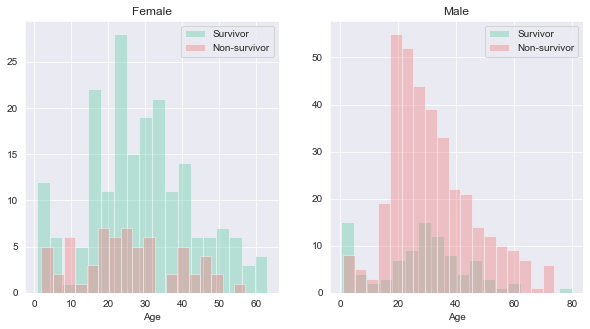

In [175]:
# Middle aged men were more likely to not survive
fig, axes = plt.subplots(1,2,figsize=(10,5))

ax = sns.distplot(women[women.Survived==1].Age.dropna(), kde=False, ax=axes[0], label='Survivor', bins=18, color='mediumaquamarine')
ax = sns.distplot(women[women.Survived==0].Age.dropna(), kde=False, ax=axes[0], label='Non-survivor', bins=18,color='lightcoral')
ax.set_title('Female')
ax.legend()

ax = sns.distplot(men[men.Survived==1].Age.dropna(), kde=False, ax=axes[1], label='Survivor', bins=18, color='mediumaquamarine')
ax = sns.distplot(men[men.Survived==0].Age.dropna(), kde=False, ax=axes[1], label='Non-survivor', bins=18, color='lightcoral')
ax.set_title('Male')
ax.legend();


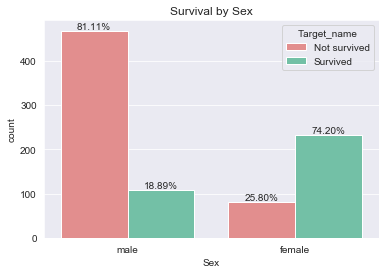

In [174]:
ax = sns.countplot(x='Sex', hue="Target_name", data=df, palette=survival_palette);
total = [len(df[df.Sex==i]) for i in df.Sex.sort_values(ascending=False).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Survival by Sex");

In [69]:
print("74% of females survived versus only 19% of males.")
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

74% of females survived versus only 19% of males.


,Sex,Survived
0,female,0.742038
1,male,0.188908


## Pclass

In [71]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


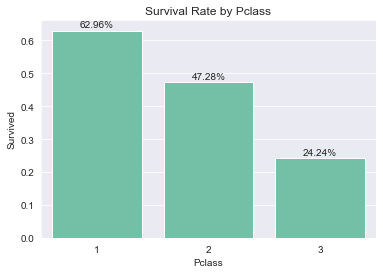

In [200]:
# Plotting above numbers
ax = sns.barplot(x='Pclass', y='Survived', data=df, color='mediumaquamarine', ci=None);
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.01,
            '{:1.2f}%'.format(p.get_height()*100), ha="center") 
ax.set_title('Survival Rate by Pclass');

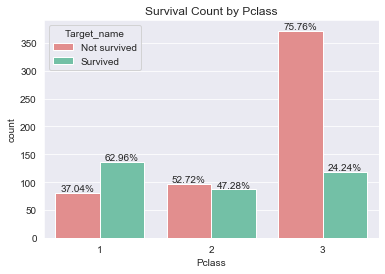

In [210]:
ax = sns.countplot(x='Pclass', hue="Target_name", data=df, palette=survival_palette);
total = [len(df[df.Pclass==i]) for i in df.Pclass.sort_values(ascending=True).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Survival Count by Pclass");

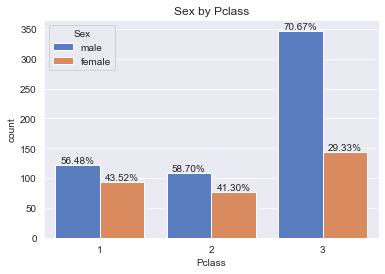

In [213]:
# As expected, Pclass three had mostly males
ax = sns.countplot(x='Pclass', hue="Sex", data=df);
total = [len(df[df.Pclass==i]) for i in df.Pclass.sort_values(ascending=True).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Sex by Pclass");